## Homework 2, Part 2, Task 1 - Naive Bayes classifier vs logistic regression classifier

In [23]:
%matplotlib inline
from IPython import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
sn.set(style='whitegrid')

### Generate some 1D data points and labels from two Gaussian PDFs (two classes)

In [24]:
rng = np.random.RandomState(0)
X=np.zeros((10000,1))
Y=np.zeros((10000,))
for n in range(0, 10000):
    #randomly select a Gaussian component (c0, c1)
    r= int(rng.rand() > 0.5)  # randn ~ uniform random distribution
    if r == 0:
       # randomly draw a sample from the Gaussian component (mean = 2, std=1)
       sample =  2.5 + rng.randn() 
       Y[n]=0
    else:
       # randomly draw a sample from the Gaussian component (mean = 6, std=1)
       sample =  3 + 0.5*rng.randn() 
       Y[n]=1
    X[n]=sample

visualize the 1D data of the two classes using 1D histogram

In [25]:
X[Y==0]

array([[1.65727595],
       [1.53924539],
       [2.1669426 ],
       ...,
       [1.2594336 ],
       [1.14410582],
       [1.5587053 ]])

[0, 6, 0, 1200]

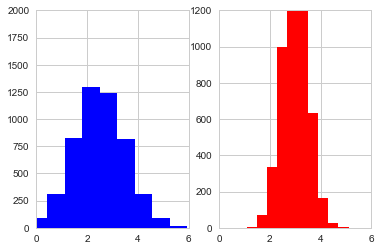

In [26]:
fig, ax = plt.subplots(1,2)
ax[0].hist(X[Y==0], bins=10, color='b')
ax[0].axis([0, 6, 0, 2000])
ax[1].hist(X[Y==1], bins=10, color='r')
ax[1].axis([0, 6, 0, 1200])

Estimate the PDF paramters

In [27]:
mu0=X[Y==0].mean()
sigma0=X[Y==0].std()
mu1=X[Y==1].mean()
sigma1=X[Y==1].std()
print('mu0', mu0, 'sigma0', sigma0)
print('mu1', mu1, 'sigma1', sigma1)

mu0 2.4860312582574795 sigma0 1.0027284302246897
mu1 3.0011429929782363 sigma1 0.5084311990006636


Show the two PDFs

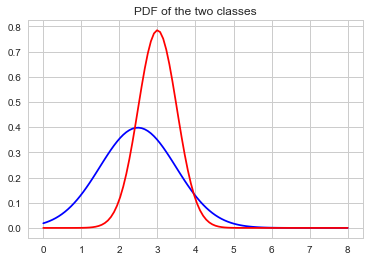

In [32]:
x = np.linspace(0, 8, 100)
p1 = np.exp(-(x-mu0)**2/(2*sigma0**2))/(np.sqrt(2*np.pi*sigma0**2))
p2 = np.exp(-(x-mu1)**2/(2*sigma1**2))/(np.sqrt(2*np.pi*sigma1**2))
plt.plot(x, p1, 'b')
plt.plot(x, p2, 'r')
plt.title('PDF of the two classes')
plt.show()

### Buile a logistic regression classifier  (a.k.a sigmoid classifier) 
Use LogisticRegression from sklearn.linear_model


Build and Train the model on 9000 data points `X[0:9000,:]` with labels `Y[0:9000]` <br>
assume the name of the model is `logit_model` (you can use other names, of couse)

In [33]:
#write your code here
from sklearn.linear_model import LogisticRegression

x_train = X[0:9000,:]
y_train = Y[0:9000]

x_train.shape
y_train.shape

logit_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)

logit_model.predict(x_test)







array([0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1.

Test the model on the remaining 1000 data points `X[9000:,:]` with labels `Y[9000:]` <br>
hint: use the function `score` of the model, read the doc of sk-learn

In [34]:
#write your code here
#print out the classification accuracy

logit_model.score(X[9000:,:],Y[9000:])

0.649

Show the decision boundary

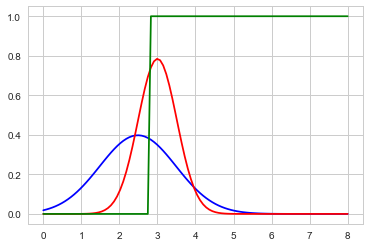

In [35]:
x = np.linspace(0, 8, 100)
y_pred = logit_model.predict(x.reshape(-1,1))
plt.plot(x, p1, 'b')
plt.plot(x, p2, 'r')
plt.plot(x, y_pred, 'g')
plt.show()

### Build a Naive Bayes classifier
use GaussianNB from sklearn.naive_bayes <br>
train the model on 9000 data points `X[0:9000,:]` with labels `Y[0:9000]` <br>

In [36]:
#write your code here
from sklearn.naive_bayes import GaussianNB

x_train = X[0:9000,:]
y_train = Y[0:9000]

clf = GaussianNB()
clf.fit(X[0:9000,:], Y[0:9000])

GaussianNB(priors=None)

test the model on the remaining 1000 data points `X[9000:,:]` with labels `Y[9000:]`

In [37]:
#write your code here
#print out the classification accuracy
GNB.score(X[9000:,:], Y[9000:])

0.7

show the decision boundary

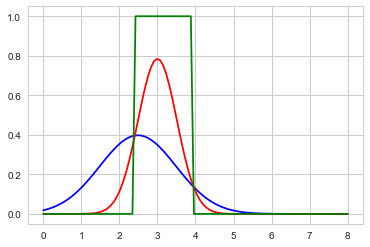

In [20]:
#write your code here
x = np.linspace(0, 8, 100)
y_pred = clf.predict(x.reshape(-1,1))
plt.plot(x, p1, 'b')
plt.plot(x, p2, 'r')
plt.plot(x, y_pred, 'g')
plt.show()



If the two PDFs overlap significantly, then the decision boundary of a Naive Bayes classifier may consist of two thresholds.

### Discussion
(1) The Naive Bayes classifier is better than the logistic regression classifier. Why? <br>
(2) Do you agree that if we can accurately model the data distribution (providing enough data), we can build a very good classifier ?

In [3]:
# write down your thoughts
(1)Because the accuracy of Naive Bayse is bigger than the accuracy of Logistic (0.7 > 0.649)
And for the decision boundary of Naive Bayes classifier, the green line can be more representative that the other one.

(2)Yes. Because the data set can fit in the model